In [17]:
import pandas as pd
import sys
import re
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('../data/data_sentiments.csv', sep=",", encoding="latin1")
# df = pd.read_csv('data/Tweets_Mg.csv', sep=",", encoding="utf8")

# df.head()

In [18]:
def cleanText(tweet):
#     print(tweet)
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    tweet = ' '.join(re.sub("[\_\|\.\,\"\'\!\?\:\;\-\=]", " ", tweet).split())
    tweet = ' '.join(re.sub("["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251""]+", " ", tweet, flags=re.UNICODE).split())
#     print(emoji_pattern)
    
    tweet = tweet.lower()
#     print(tweet)
    return tweet

l = []
for i,j in zip(df['text'], df['target']):
    t = cleanText(i)
    l.append([t, j])

In [15]:
x_train = []
y_train = []

sw = set(stopwords.words('english') + list(punctuation))

palavras_sem_stopwords = [palavra for palavra in l ]

for i in l:
    lTemp = i[0].split(" ")
    lPost = []
    
    for j in lTemp:        
        if j not in sw:
            try:
                if j != "":
                    if j.split()[0].isdigit():
        #                 print(j)
                        lPost.append(j)
            except IndexError as ie:
                print("ERRO: " + j)
         
    
    lFinal = " ".join(lPost)
    x_train.append(lFinal)
    y_train.append(i[1])    

# print(x_train[0:5])
# print(y_train[0:5])

In [20]:
# l
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(x_train)

In [4]:
# print(X_train_counts.todense()
# count_vect.get_feature_names()
# print("000" in x_train)

# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [2]:
# docs_new = ['death']
# X_new_counts = count_vect.transform(docs_new)
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# predicted = clf.predict(X_new_tfidf)
# print(predicted)

In [118]:
df = pd.read_csv('../data/dataTweeter.csv', sep=";")

In [119]:
df["clean_text"] = df.POST.apply(cleanText)

In [120]:
l = df["clean_text"].tolist()

In [88]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()    
# X = vectorizer.fit_transform(l)
# # X.get_feature()

In [175]:
l_m = l[0:5]

In [176]:
vectorizer=TfidfVectorizer(use_idf=True)
tfIdf = vectorizer.fit_transform(l_m)
# print(tfIdf.todense())
# print(l_m)
# vectorizer.get_feature_names()
df_1 = pd.DataFrame(tfIdf.todense(), columns=vectorizer.get_feature_names())
# df_2 = df_1.sort_values('TFIDF', ascending=False)
df_1.T.head(25)
# tfIdf.T.todense()
# l_m

,0,1,2,3,4
advocacia,0.000000,0.246595,0.000000,0.000000,0.000000
bastidores,0.000000,0.000000,0.000000,0.000000,0.434297
blog,0.000000,0.000000,0.000000,0.000000,0.434297
butantan,0.331572,0.000000,0.000000,0.000000,0.000000
casa,0.000000,0.246595,0.000000,0.000000,0.000000
civil,0.000000,0.246595,0.000000,0.000000,0.000000
com,0.000000,0.000000,0.209454,0.000000,0.000000
comandos,0.000000,0.246595,0.000000,0.000000,0.000000
comia,0.000000,0.000000,0.209454,0.000000,0.000000
contato,0.000000,0.000000,0.209454,0.000000,0.000000


In [102]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(l)

# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# Sum_of_squared_distances = []
# K = range(2,10)
# for k in K:
#     km = KMeans(n_clusters=k, max_iter=200, n_init=10)
#     km = km.fit(X)
#     Sum_of_squared_distances.append(km.inertia_)

In [103]:
# Sum_of_squared_distances

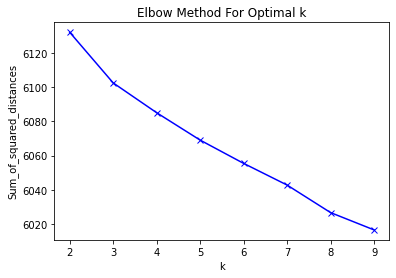

In [99]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [101]:
# print('How many clusters do you want to use?')
# true_k = int(input())
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
# model.fit(X)

# labels=model.labels_
# clusters=pd.DataFrame(list(zip(reasons,labels)),columns=['title','cluster'])
# #print(clusters.sort_values(by=['cluster']))

# for i in range(true_k):
#     print(clusters[clusters['cluster'] == i])

In [182]:

# # Read from HDFS
# df_load = sparkSession.read.csv('hdfs://cluster/user/hdfs/test/example.csv')
# df_load.show()

OSError: [Errno 12] Cannot allocate memory